In [12]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
C_Root = '/content/drive/MyDrive/Sudoku'

In [13]:
dataset = pd.read_csv(f'{C_Root}/Mnist_Sudoku.csv')
X = dataset.iloc[:, 0:-1].values / 255.
y = dataset.iloc[:, -1].values

In [15]:
X = X.reshape((70000, 28, 28, 1))

In [4]:
# Necessary Helper Utilities

def plot_generator():
    metrics = ['Accuracy', 'Loss']
    linetype = ['-', '--']
    fig, axes = plt.subplots(1, 2, figsize = (18, 5))
    epochs = range(len(history.history[metrics[0].lower()]))
    for i in range(len(metrics)):
        axes[i].plot(epochs, history.history[metrics[i].lower()], 'r'+ linetype[i], label = 'Training')
        axes[i].plot(epochs, history.history['val_' + metrics[i].lower()], 'b' + linetype[i] , label = 'Validation')
        axes[i].set_title(metrics[i], fontsize = 16)
        axes[i].grid(True)
        axes[i].set_xlabel('Epoch')
        axes[i].set_ylabel(metrics[i])
        axes[i].legend()

def lrscheduler(epoch, lr):
  if epoch % C_Lr_Interval == C_Lr_Interval - 1:
    return lr * 0.1 
  else:
    return lr

def cb_def():
    cb = [
          tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = C_Patience, restore_best_weights = True, min_delta = 0.0001),
          tf.keras.callbacks.LearningRateScheduler(lrscheduler)
         ]
    return cb

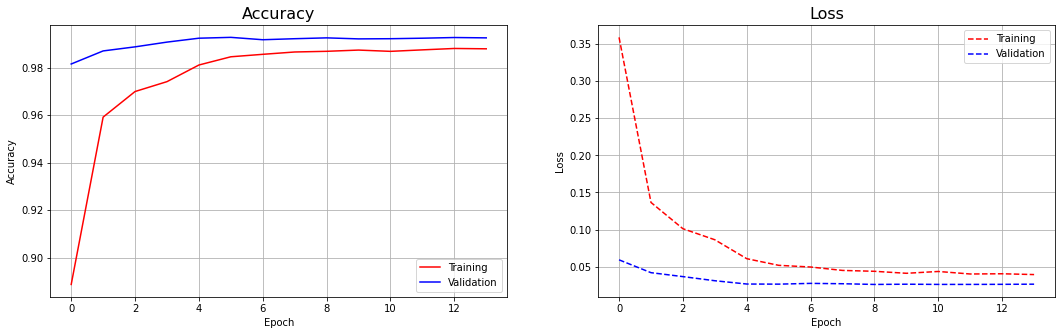

In [24]:
def build_model():
    model = tf.keras.models.Sequential([
                        tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                        tf.keras.layers.MaxPooling2D(2,2),
                        tf.keras.layers.Flatten(),
                        tf.keras.layers.Dense(128, activation='relu'),
                        tf.keras.layers.Dropout(0.75),
                        tf.keras.layers.Dense(10, activation='softmax')
                        ])
    tf.keras.utils.plot_model(recognizer, f"{C_Root}/model.png")
    model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
    return model


C_Patience = 5
C_Lr_Interval = 5
recognizer = build_model()
history = recognizer.fit(X, y, validation_split=0.2, epochs = 30, verbose = 0, callbacks=cb_def())
plot_generator()

8


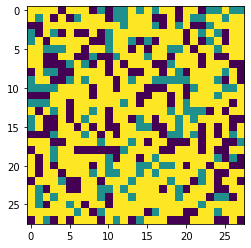

In [37]:
import numpy as np
new_val = [np.random.choice([0, 128, 255], p = [0.25, 0.05, 0.9]) for _ in range(784)]
new_val = np.array(new_val).reshape(1, 28, 28, 1)
prediction = np.argmax(recognizer.predict(new_val))
plt.imshow(new_val.reshape(28, 28))

print(prediction)

In [38]:
tf.keras.models.save_model(recognizer, f"{C_Root}/DigitRecognizer")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Sudoku/DigitRecognizer/assets
